In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,f1_score,precision_score,accuracy_score

In [2]:
data = pd.read_csv('fraud_oracle.csv')
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [3]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
data.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [7]:
data.shape

(15420, 33)

In [8]:
pd.set_option('display.max_columns', None)
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [9]:
final_df = data[['Age',
 'WeekOfMonth',
 'Make',
 'DayOfWeekClaimed',
 'WeekOfMonthClaimed',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'NumberOfSuppliments',
 'BasePolicy',
   'FraudFound_P']]

In [10]:
final_df[final_df['FraudFound_P'] ==1].head(10)

,Age,WeekOfMonth,Make,DayOfWeekClaimed,WeekOfMonthClaimed,Fault,PolicyType,VehicleCategory,VehiclePrice,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,BasePolicy,FraudFound_P
28,0,1,Honda,Tuesday,4,Policy Holder,Sedan - All Perils,Sedan,more than 69000,none,new,16 to 17,none,All Perils,1
52,21,3,Honda,Wednesday,4,Policy Holder,Sport - Collision,Sport,more than 69000,none,4 years,26 to 30,3 to 5,Collision,1
53,50,4,Honda,Wednesday,2,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,none,more than 7,41 to 50,3 to 5,Collision,1
94,34,2,Honda,Friday,3,Policy Holder,Sport - Collision,Sport,more than 69000,none,7 years,31 to 35,3 to 5,Collision,1
96,38,2,Toyota,Tuesday,1,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,7 years,36 to 40,none,Collision,1
100,31,3,Chevrolet,Wednesday,2,Policy Holder,Utility - All Perils,Utility,more than 69000,more than 4,7 years,31 to 35,more than 5,All Perils,1
113,56,4,Accura,Tuesday,2,Policy Holder,Utility - All Perils,Utility,more than 69000,none,more than 7,51 to 65,none,All Perils,1
118,68,5,Mazda,Wednesday,1,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,2 to 4,5 years,over 65,none,All Perils,1
119,0,1,Honda,Friday,3,Policy Holder,Sedan - All Perils,Sedan,more than 69000,none,new,16 to 17,none,All Perils,1
147,39,1,Toyota,Tuesday,3,Policy Holder,Sedan - All Perils,Sedan,30000 to 39000,none,more than 7,36 to 40,more than 5,All Perils,1


In [11]:
data[data['PastNumberOfClaims']=='none']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,20,Third Party,Sport - Collision,Sport,more than 69000,0,6,12,400,3,more than 30,more than 30,none,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30,Policy Holder,Sport - Collision,Sport,more than 69000,0,9,7,400,4,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Nov,3,Wednesday,Ford,Urban,Friday,Nov,3,Male,Single,32,Third Party,Sedan - Collision,Sedan,60000 to 69000,0,15407,6,400,4,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15408,Nov,3,Thursday,Toyota,Urban,Wednesday,Nov,4,Male,Married,51,Policy Holder,Sedan - All Perils,Sedan,more than 69000,1,15409,14,400,1,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1996,All Perils
15414,Nov,4,Friday,Chevrolet,Urban,Monday,Nov,4,Male,Single,58,Third Party,Sedan - Collision,Sedan,30000 to 39000,0,15415,3,400,4,more than 30,more than 30,none,7 years,51 to 65,No,No,External,1 to 2,4 to 8 years,2 vehicles,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [12]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print()

Month
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

WeekOfMonth
[5 3 2 4 1]

DayOfWeek
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea
['Urban' 'Rural']

DayOfWeekClaimed
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

MonthClaimed
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

WeekOfMonthClaimed
[1 4 2 3 5]

Sex
['Female' 'Male']

MaritalStatus
['Single' 'Married' 'Widow' 'Divorced']

Age
[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]

Fault
['Policy Holder' 'Third Party']

PolicyType
['Sport - Liability' 'Sport - Collision' 'Sedan -

In [13]:
data.isnull().sum() 

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [14]:
print(data[data['Age']==0].shape)
data[data['Age']==0].head()

(320, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,more than 69000,0,8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,more than 69000,0,14,12,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,1,29,9,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,more than 69000,0,32,6,400,1,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,59,15,400,4,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability


In [15]:
print(data["FraudFound_P"].value_counts())

0    14497
1      923
Name: FraudFound_P, dtype: int64


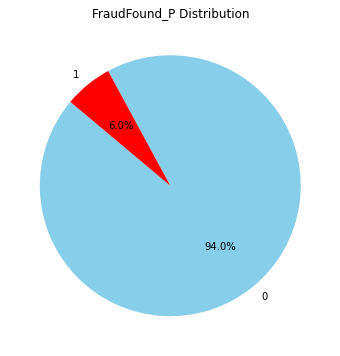

In [16]:
fraud_counts = data['FraudFound_P'].value_counts()
fraud_values = fraud_counts.values
labels = fraud_counts.index
plt.figure(figsize=(8, 6))
plt.pie(fraud_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'red'])
plt.title('FraudFound_P Distribution')
plt.show()

In [17]:
data[data['PastNumberOfClaims']=='none']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,20,Third Party,Sport - Collision,Sport,more than 69000,0,6,12,400,3,more than 30,more than 30,none,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30,Policy Holder,Sport - Collision,Sport,more than 69000,0,9,7,400,4,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Nov,3,Wednesday,Ford,Urban,Friday,Nov,3,Male,Single,32,Third Party,Sedan - Collision,Sedan,60000 to 69000,0,15407,6,400,4,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15408,Nov,3,Thursday,Toyota,Urban,Wednesday,Nov,4,Male,Married,51,Policy Holder,Sedan - All Perils,Sedan,more than 69000,1,15409,14,400,1,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1996,All Perils
15414,Nov,4,Friday,Chevrolet,Urban,Monday,Nov,4,Male,Single,58,Third Party,Sedan - Collision,Sedan,30000 to 39000,0,15415,3,400,4,more than 30,more than 30,none,7 years,51 to 65,No,No,External,1 to 2,4 to 8 years,2 vehicles,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [18]:
data['PastNumberOfClaims'].value_counts()

2 to 4         5485
none           4352
1              3573
more than 4    2010
Name: PastNumberOfClaims, dtype: int64

In [19]:
print(data[data['Age']==0]['AgeOfPolicyHolder'].unique())

['16 to 17']


In [20]:
data['Age'] = data['Age'].replace({0:16.5})
data = data.drop(['Month','DayOfWeek','MonthClaimed','RepNumber','DriverRating','Year'], axis=1)
data

,WeekOfMonth,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,Honda,Urban,Tuesday,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,300,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,3,Honda,Urban,Monday,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,400,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,5,Honda,Urban,Thursday,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,400,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,2,Toyota,Rural,Friday,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,400,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,5,Honda,Urban,Tuesday,2,Female,Single,27.0,Third Party,Sport - Collision,Sport,more than 69000,0,5,400,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,Toyota,Urban,Tuesday,5,Male,Married,35.0,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,400,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,5,Pontiac,Urban,Friday,1,Male,Married,30.0,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,400,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,5,Toyota,Rural,Friday,1,Male,Single,24.0,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,400,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,1,Toyota,Urban,Thursday,2,Female,Married,34.0,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,400,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[data.select_dtypes(include='object').columns] = data[data.select_dtypes(include='object').columns].apply(le.fit_transform)
data

,WeekOfMonth,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,6,1,6,1,0,2,21.0,0,5,1,5,0,1,300,3,2,3,1,3,0,0,0,3,0,2,2
1,3,6,1,2,4,1,2,34.0,0,4,1,5,0,2,400,3,2,3,4,4,1,0,0,3,3,0,1
2,5,6,1,5,2,1,1,47.0,0,4,1,5,0,3,400,3,2,0,5,6,0,0,0,3,3,0,1
3,2,17,0,1,1,1,1,65.0,1,2,1,0,0,4,400,3,2,0,6,7,1,0,0,2,3,0,2
4,5,6,1,6,2,0,2,27.0,1,4,1,5,0,5,400,3,2,3,3,4,0,0,0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,17,1,6,5,1,1,35.0,0,1,0,0,1,15416,400,3,2,1,4,4,0,0,0,3,3,0,1
15416,5,13,1,1,1,1,1,30.0,0,2,1,1,0,15417,400,3,2,2,4,4,0,0,0,2,3,2,2
15417,5,17,0,1,1,1,2,24.0,0,1,0,0,1,15418,400,3,2,2,3,3,0,0,0,0,3,0,1
15418,1,17,1,5,2,0,1,34.0,1,0,0,0,0,15419,400,3,2,3,0,4,0,0,0,2,3,0,0


In [22]:
X = data.drop(['FraudFound_P'], axis=1)
X

,WeekOfMonth,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,6,1,6,1,0,2,21.0,0,5,1,5,1,300,3,2,3,1,3,0,0,0,3,0,2,2
1,3,6,1,2,4,1,2,34.0,0,4,1,5,2,400,3,2,3,4,4,1,0,0,3,3,0,1
2,5,6,1,5,2,1,1,47.0,0,4,1,5,3,400,3,2,0,5,6,0,0,0,3,3,0,1
3,2,17,0,1,1,1,1,65.0,1,2,1,0,4,400,3,2,0,6,7,1,0,0,2,3,0,2
4,5,6,1,6,2,0,2,27.0,1,4,1,5,5,400,3,2,3,3,4,0,0,0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,17,1,6,5,1,1,35.0,0,1,0,0,15416,400,3,2,1,4,4,0,0,0,3,3,0,1
15416,5,13,1,1,1,1,1,30.0,0,2,1,1,15417,400,3,2,2,4,4,0,0,0,2,3,2,2
15417,5,17,0,1,1,1,2,24.0,0,1,0,0,15418,400,3,2,2,3,3,0,0,0,0,3,0,1
15418,1,17,1,5,2,0,1,34.0,1,0,0,0,15419,400,3,2,3,0,4,0,0,0,2,3,0,0


In [23]:
y = data['FraudFound_P']
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=42)

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [27]:
X_train_smote

,WeekOfMonth,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,4,13,1,6,5,0,1,53.000000,1,2,1,0,15036,700,3,2,3,6,6,0,0,1,2,3,0,2
1,2,9,1,2,2,1,1,48.000000,0,1,0,1,10942,400,3,2,2,5,6,0,0,0,1,2,1,1
2,5,9,1,5,5,1,1,28.000000,0,1,0,0,14808,400,3,2,3,5,4,0,0,0,0,3,0,1
3,2,13,1,2,4,0,1,48.000000,0,0,0,0,279,400,3,2,1,5,6,0,0,0,1,3,0,0
4,4,6,1,2,2,1,1,36.000000,0,0,0,1,6772,400,3,2,0,3,5,0,0,0,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8701,2,9,1,4,2,1,1,32.932056,0,0,0,4,13493,400,3,2,0,4,4,0,0,0,3,3,0,0
8702,2,10,1,5,3,1,1,30.565842,0,0,0,1,648,411,3,2,0,4,4,0,0,0,2,2,0,0
8703,3,17,0,4,2,1,1,40.784615,0,0,0,3,15412,400,3,2,2,4,4,0,0,0,1,3,0,0
8704,1,3,0,1,2,0,1,37.502743,0,0,0,1,12676,400,3,2,1,4,4,0,0,0,2,3,0,0


In [28]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
8701    1
8702    1
8703    1
8704    1
8705    1
Name: FraudFound_P, Length: 8706, dtype: int64

In [29]:
print("Class distribution before SMOTE:", y.value_counts())
print("Class distribution after SMOTE:", y_train_smote.value_counts())

Class distribution before SMOTE: 0    14497
1      923
Name: FraudFound_P, dtype: int64
Class distribution after SMOTE: 1    4353
0    4353
Name: FraudFound_P, dtype: int64


In [30]:
data

,WeekOfMonth,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,6,1,6,1,0,2,21.0,0,5,1,5,0,1,300,3,2,3,1,3,0,0,0,3,0,2,2
1,3,6,1,2,4,1,2,34.0,0,4,1,5,0,2,400,3,2,3,4,4,1,0,0,3,3,0,1
2,5,6,1,5,2,1,1,47.0,0,4,1,5,0,3,400,3,2,0,5,6,0,0,0,3,3,0,1
3,2,17,0,1,1,1,1,65.0,1,2,1,0,0,4,400,3,2,0,6,7,1,0,0,2,3,0,2
4,5,6,1,6,2,0,2,27.0,1,4,1,5,0,5,400,3,2,3,3,4,0,0,0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,17,1,6,5,1,1,35.0,0,1,0,0,1,15416,400,3,2,1,4,4,0,0,0,3,3,0,1
15416,5,13,1,1,1,1,1,30.0,0,2,1,1,0,15417,400,3,2,2,4,4,0,0,0,2,3,2,2
15417,5,17,0,1,1,1,2,24.0,0,1,0,0,1,15418,400,3,2,2,3,3,0,0,0,0,3,0,1
15418,1,17,1,5,2,0,1,34.0,1,0,0,0,0,15419,400,3,2,3,0,4,0,0,0,2,3,0,0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

DCT_fit = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=4, 
                                 min_samples_leaf=2, random_state=42, class_weight={0: 1, 1: 3})
ABC_fit = AdaBoostClassifier(base_estimator=DCT_fit, n_estimators=500, learning_rate=0.1, random_state=42)
ABC_fit.fit(X_train_scaled, y_train_smote)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 3},
                                                         max_depth=3,
                                                         min_samples_leaf=2,
                                                         min_samples_split=4,
                                                         random_state=42),
                   learning_rate=0.1, n_estimators=500, random_state=42)

In [33]:
y_train_pred = ABC_fit.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train_smote, y_train_pred))

Training Accuracy: 0.9925338846772341
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4353
           1       0.99      1.00      0.99      4353

    accuracy                           0.99      8706
   macro avg       0.99      0.99      0.99      8706
weighted avg       0.99      0.99      0.99      8706



In [34]:
y_test_pred = ABC_fit.predict(X_test_scaled)
print("Testing Accuracy:\n",accuracy_score(y_test,y_test_pred))
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Testing Accuracy:
 0.9172688530665184
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     10144
           1       0.22      0.15      0.18       650

    accuracy                           0.92     10794
   macro avg       0.58      0.56      0.57     10794
weighted avg       0.90      0.92      0.91     10794

Confusion Matrix:
 [[9803  341]
 [ 552   98]]


In [35]:
import pickle
pickle.dump(ABC_fit,open("model.pickle","wb"))
pickle.dump(scaler,open("scaler.pickle","wb"))